In [1]:
#https://keras.io/examples/vision/zero_dce/
#https://arxiv.org/pdf/2001.06826.pdf

In [2]:
!git clone https://github.com/niazwazir/PAPERS_ORIGINAL_MODELS.git

Cloning into 'PAPERS_ORIGINAL_MODELS'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [4]:
def build_dce_net():
    input_img = keras.Input(shape=[None, None, 3])
    conv1 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(input_img)
    conv2 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(conv1)
    conv3 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(conv2)
    conv4 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(conv3)

    int_con1 = layers.Concatenate(axis=-1)([conv4, conv3])
    
    conv5 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(int_con1)

    int_con2 = layers.Concatenate(axis=-1)([conv5, conv2])

    conv6 = layers.Conv2D(32, (3, 3), strides=(1, 1), activation="relu", padding="same")(int_con2)

    int_con3 = layers.Concatenate(axis=-1)([conv6, conv1])

    x_r = layers.Conv2D(24, (3, 3), strides=(1, 1), activation="tanh", padding="same")(int_con3)
    
    model = Model(inputs=input_img, outputs=x_r)
    return model
model = build_dce_net()

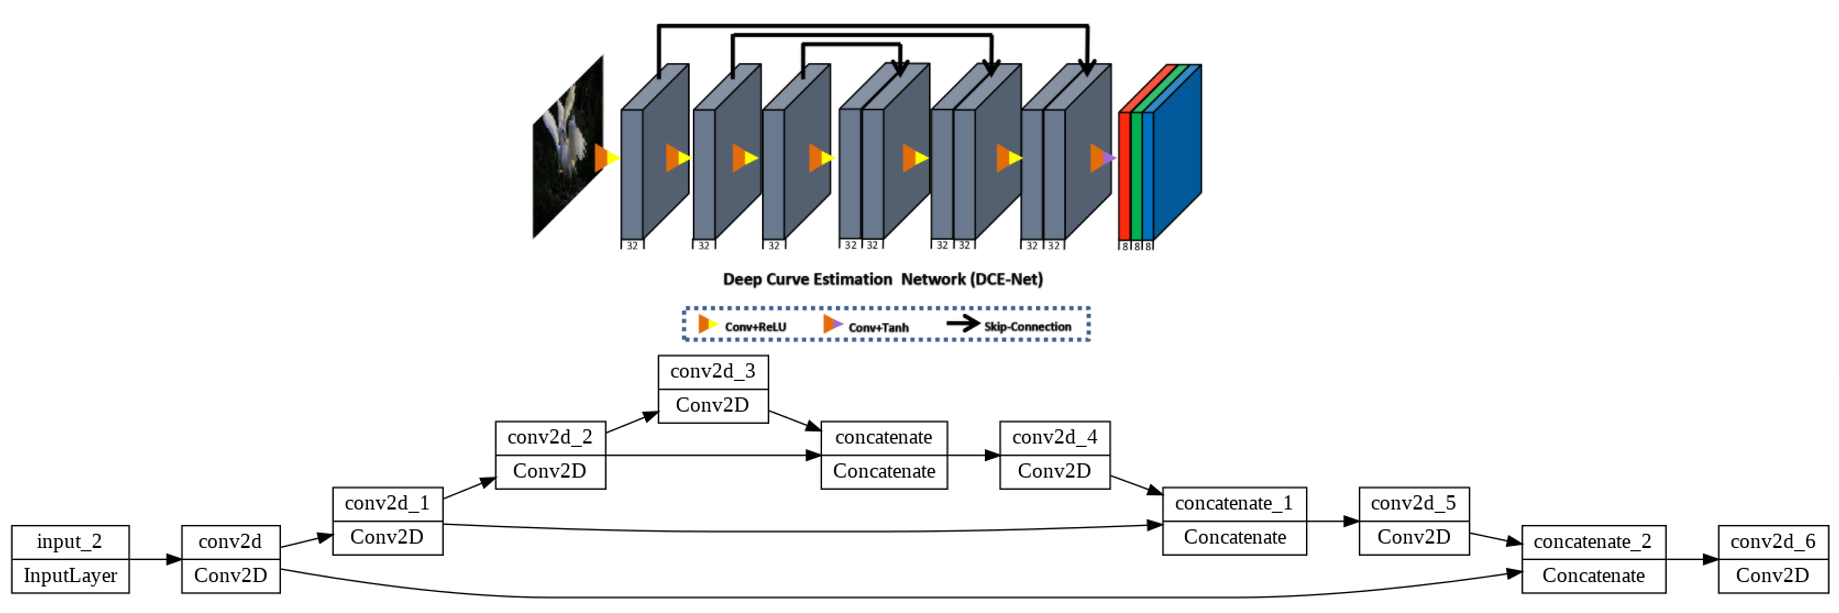

In [5]:
from IPython.display import Image
Image('PAPERS_ORIGINAL_MODELS/DCNET.png')

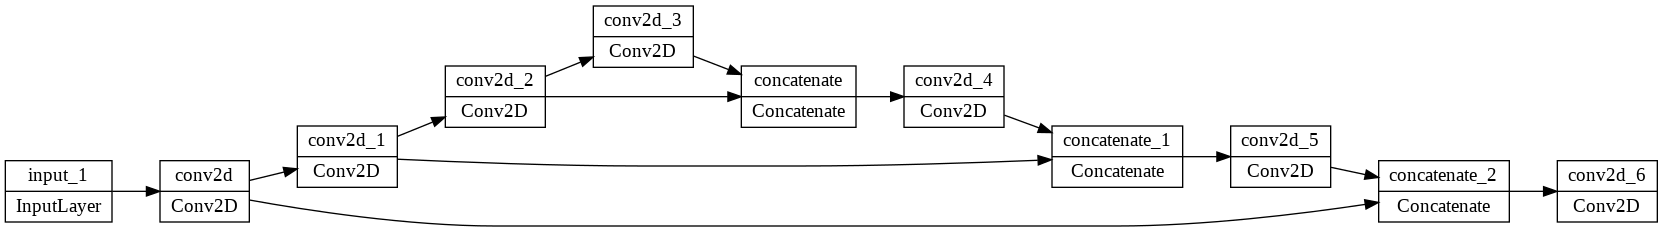

In [6]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

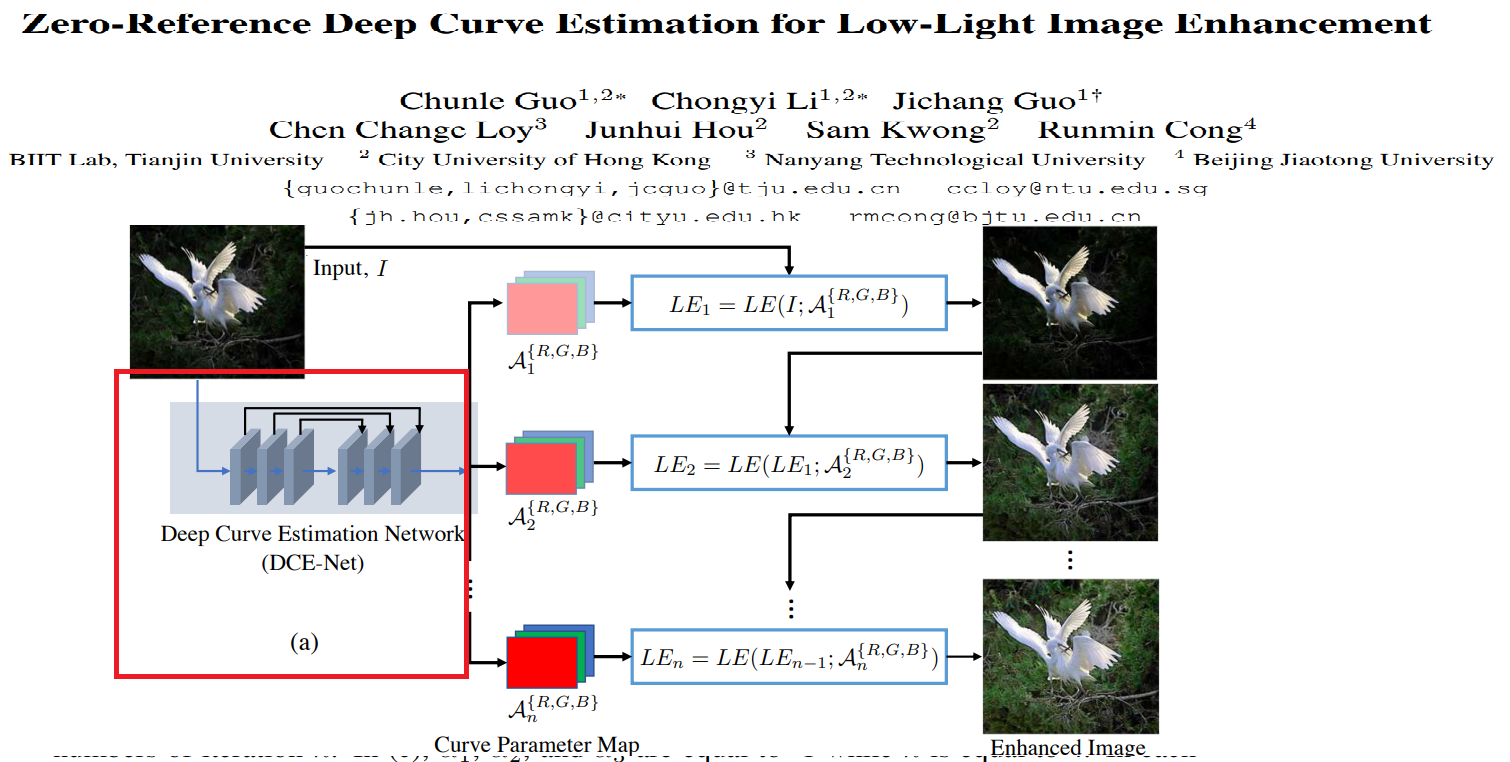

In [7]:
from IPython.display import Image
Image('PAPERS_ORIGINAL_MODELS/DCE_NET_PAPER_Figure.png')